In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras
# keras是TensorFlow为高效实现深度学习模型而提供的高级API

In [16]:
print(tf.__version__)
print(sys.version_info)
for module in mpl,np,pd,sklearn,tf,keras:
    print(module.__name__,module.__version__)


2.6.2
sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)
matplotlib 3.3.4
numpy 1.19.5
pandas 1.1.5
sklearn 0.24.2
tensorflow 2.6.2
keras.api._v2.keras 2.6.0


In [17]:
#fashion_mnist图像分类数据集
fashion_mnist=keras.datasets.fashion_mnist
(x_train_all,y_train_all),(x_test,y_test)=fashion_mnist.load_data()
x_valid,x_train=x_train_all[:5000],x_train_all[5000:]
y_valid,y_train=y_train_all[:5000],y_train_all[5000:]
# <class 'numpy.ndarray'> 训练集 验证集 测试集
print(type(y_test))
print(x_train.shape,y_train.shape)
print(x_valid.shape,y_valid.shape)
print(x_test.shape,y_test.shape)

<class 'numpy.ndarray'>
(55000, 28, 28) (55000,)
(5000, 28, 28) (5000,)
(10000, 28, 28) (10000,)


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   1   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  44 127 182 185 161 120  55
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  42 198 251 255 251 249 247 255 252
  214 100   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   2   0   0 233 252 237 239 234 237 235 237 237
  254 227   0   0   0   0   1   0   0   0]
 [  0   0   0   0   0   2   0   0  16 210 225 215 175 217 216 193 196 226
  221 209  50   0   0   2   0   0   0   0]
 [  0   0   0   0   2   0   0 199 229 232 230 245 204 219 253 245 207 194
  223 231 236 235   0   0   3   0   0   0]
 [  0   0   0   0   1   0 137 235 204 209 201 209 234 190 234 218 215 238
  239 204 189 224 154   0   0   0   0   0]
 [  0   0   0   0   0   0 194 201 200 209 202 193 205 194 183 218 231 197
  172 181 193 205 199   0   0   0   0   0]
 [  0   0   0   0   0   3 212 203 188 189 196 198 198 201 196 21

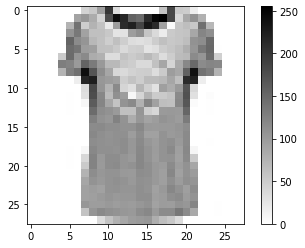

184
0


In [18]:
def show_single_image(img_arr):
    plt.imshow(img_arr,cmap='binary')
    #显示色阶条
    plt.colorbar()
    plt.show()
print(x_train[0])
show_single_image(x_train[1])# 展示样本1
print(x_train[1,0,18])# 样本1 纵坐标0 横坐标18
print(y_train[1])

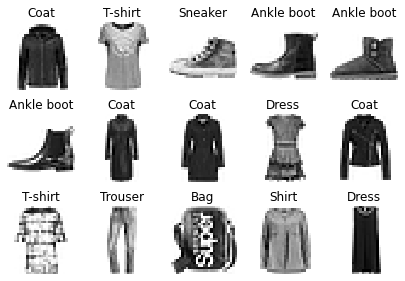

In [19]:
def show_imgs(n_rows,n_cols,x_data,y_data,class_names):
    assert len(x_data)==len(y_data) #保证样本数一致
    assert n_rows*n_cols<len(x_data) #确保打印的图片数小于总样本数
    plt.figure(figsize=(n_cols*1.4,n_rows*1.6))
    for row in range(n_rows):
        for col in range(n_cols):
            index=n_cols*row+col
            plt.subplot(n_rows,n_cols,index+1)
            plt.imshow(x_data[index],cmap='binary',interpolation='nearest')
            plt.axis('off') #去除坐标系
            plt.title(class_names[y_data[index]])
    plt.show()
# 已知的图片类别 lables
# https://github.com/zalandoresearch/fashion-mnist
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress',
               'Coat', 'Sandal', 'Shirt', 'Sneaker',
               'Bag', 'Ankle boot']
show_imgs(3,5,x_train,y_train,class_names)

In [20]:
# equential将线性的层堆叠到一个tf.keras.Model
model=keras.models.Sequential()
# 把28*28的图片展平为一个一维向量
model.add(keras.layers.Flatten(input_shape=[28,28]))
print(model.output_shape)
# Dense是全连接层，添加全连接层，单元数是300
# relu: y=max(0,x)  softmax: 将向量变为概率分布
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

# model = keras.models.Sequential([
#     keras.layers.Flatten(input_shape=[28, 28]),
#     keras.layers.Dense(300, activation='relu'),
#     keras.layers.Dense(100, activation='relu'),
#     keras.layers.Dense(10, activation='softmax')
# ])

# sparse_categorical_cross entropy计算稀疏分类crossentropy损失
# targets是one-hot编码用categorical_crossentropy计算分类crossentropy损失
# optimizer是优化方法
# metrics模型在训练和测试期间要评估的指标列表
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.SGD(0.001),
              metrics=['accuracy'])
print('特征28*28='+str(28*28))

(None, 784)
特征28*28=784


In [21]:
print(model.layers)

[<keras.layers.core.Flatten object at 0x7f3f48277390>, <keras.layers.core.Dense object at 0x7f3f50675128>, <keras.layers.core.Dense object at 0x7f3f507087b8>, <keras.layers.core.Dense object at 0x7f3f5061c2e8>]


In [22]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
None


In [23]:
# 最后加上偏置
# [None, 784] * W + b -> [None, 300] 
# W.shape[784, 300], b = [300]
#W是矩阵，b是一个偏置，是一个向量
print(784*300+300)
print(300*100+100)
print(100*10+10)

235500
30100
1010


In [24]:
print(model.variables) # 模型中训练的参数

[<tf.Variable 'dense_3/kernel:0' shape=(784, 300) dtype=float32, numpy=
array([[ 0.06458989,  0.0099644 , -0.01855639, ...,  0.00140715,
         0.0712513 , -0.06104819],
       [-0.0697412 ,  0.01279476, -0.03503193, ...,  0.0222579 ,
         0.02939434, -0.00136622],
       [ 0.05947687,  0.02706204, -0.06097368, ...,  0.03480051,
        -0.00661197,  0.01887622],
       ...,
       [-0.03316462,  0.03568704,  0.04053286, ..., -0.04067024,
         0.00046872,  0.0047911 ],
       [ 0.05084813, -0.03551922,  0.01305274, ..., -0.01656308,
        -0.06792887, -0.02396058],
       [-0.01380885, -0.03867723,  0.03214211, ...,  0.02821795,
        -0.06600505,  0.02387183]], dtype=float32)>, <tf.Variable 'dense_3/bias:0' shape=(300,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0

In [25]:
print(model.trainable_variables)

[<tf.Variable 'dense_3/kernel:0' shape=(784, 300) dtype=float32, numpy=
array([[ 0.06458989,  0.0099644 , -0.01855639, ...,  0.00140715,
         0.0712513 , -0.06104819],
       [-0.0697412 ,  0.01279476, -0.03503193, ...,  0.0222579 ,
         0.02939434, -0.00136622],
       [ 0.05947687,  0.02706204, -0.06097368, ...,  0.03480051,
        -0.00661197,  0.01887622],
       ...,
       [-0.03316462,  0.03568704,  0.04053286, ..., -0.04067024,
         0.00046872,  0.0047911 ],
       [ 0.05084813, -0.03551922,  0.01305274, ..., -0.01656308,
        -0.06792887, -0.02396058],
       [-0.01380885, -0.03867723,  0.03214211, ...,  0.02821795,
        -0.06600505,  0.02387183]], dtype=float32)>, <tf.Variable 'dense_3/bias:0' shape=(300,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0

In [26]:
# 20次epoch 一次训练默认输入batch_size=32个样本
history = model.fit(x_train, y_train, epochs=20,validation_data=(x_valid,y_valid))

Epoch 1/20
1719/1719 [==============================] - 4s 2ms/step - loss: 2.5396 - accuracy: 0.6853 - val_loss: 0.6741 - val_accuracy: 0.7404
Epoch 2/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6107 - accuracy: 0.7687 - val_loss: 0.5749 - val_accuracy: 0.7900
Epoch 3/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5322 - accuracy: 0.7991 - val_loss: 0.5355 - val_accuracy: 0.8034
Epoch 4/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4775 - accuracy: 0.8219 - val_loss: 0.4936 - val_accuracy: 0.8290
Epoch 5/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4430 - accuracy: 0.8353 - val_loss: 0.5040 - val_accuracy: 0.8198
Epoch 6/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4205 - accuracy: 0.8433 - val_loss: 0.4893 - val_accuracy: 0.8294
Epoch 7/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4025 - accuracy: 0.8492 - val_loss: 0.4562 - val_accuracy:

In [27]:
print(type(history)) # <class 'keras.callbacks.History'>

<class 'keras.callbacks.History'>


In [29]:
#
history.history
# print(history.history)

{'loss': [2.53959321975708,
  0.6106996536254883,
  0.5321545600891113,
  0.4774593412876129,
  0.4430418610572815,
  0.4204738140106201,
  0.40254658460617065,
  0.38886356353759766,
  0.37597882747650146,
  0.364698201417923,
  0.356689989566803,
  0.34944501519203186,
  0.34126150608062744,
  0.33478450775146484,
  0.328867644071579,
  0.322105348110199,
  0.3171302080154419,
  0.3115876019001007,
  0.30750519037246704,
  0.30267611145973206],
 'accuracy': [0.6852909326553345,
  0.7686727046966553,
  0.7991454601287842,
  0.8219272494316101,
  0.8352545499801636,
  0.8432909250259399,
  0.8491818308830261,
  0.8548727035522461,
  0.8604182004928589,
  0.8634545207023621,
  0.8661817908287048,
  0.8682000041007996,
  0.8709454536437988,
  0.8748000264167786,
  0.8752181529998779,
  0.8785091042518616,
  0.87983638048172,
  0.8832363486289978,
  0.8840363621711731,
  0.885381817817688],
 'val_loss': [0.6740936636924744,
  0.574913501739502,
  0.5354754328727722,
  0.4935646057128906,


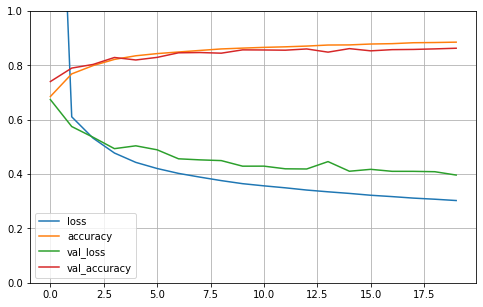

In [30]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1) # 纵坐标的刻度范围
    plt.show()
plot_learning_curves(history) #横坐标是epochs

In [31]:
# 测试集上评估 测试集的损失和准确率
print(model.evaluate(x_test,y_test,verbose=0))

[0.4335508644580841, 0.8526999950408936]


In [32]:
# 标签和预测之间的crossentropy(交叉熵)损失
cce=keras.losses.SparseCategoricalCrossentropy()
loss=cce([0, 1, 2],[[.9, .05, .05], [.05, .89, .06], [.05, .01, .94]])
print('loss:',loss.numpy())

loss: 0.09458992


In [33]:
# softmax计算
z=np.array([1.0, 2.0, 3.0, 4.0, 1.0, 2.0, 3.0])
m=np.exp(z)/sum(np.exp(z))
print(sum(m))

0.9999999999999999
